In [ ]:
import nltk
from nltk.corpus import inaugural

nltk.download("inaugural")

In [14]:
for idx, fileid in enumerate(inaugural.fileids()):
    print(f"#{idx+1} {fileid}")

#1 1789-Washington.txt
#2 1793-Washington.txt
#3 1797-Adams.txt
#4 1801-Jefferson.txt
#5 1805-Jefferson.txt
#6 1809-Madison.txt
#7 1813-Madison.txt
#8 1817-Monroe.txt
#9 1821-Monroe.txt
#10 1825-Adams.txt
#11 1829-Jackson.txt
#12 1833-Jackson.txt
#13 1837-VanBuren.txt
#14 1841-Harrison.txt
#15 1845-Polk.txt
#16 1849-Taylor.txt
#17 1853-Pierce.txt
#18 1857-Buchanan.txt
#19 1861-Lincoln.txt
#20 1865-Lincoln.txt
#21 1869-Grant.txt
#22 1873-Grant.txt
#23 1877-Hayes.txt
#24 1881-Garfield.txt
#25 1885-Cleveland.txt
#26 1889-Harrison.txt
#27 1893-Cleveland.txt
#28 1897-McKinley.txt
#29 1901-McKinley.txt
#30 1905-Roosevelt.txt
#31 1909-Taft.txt
#32 1913-Wilson.txt
#33 1917-Wilson.txt
#34 1921-Harding.txt
#35 1925-Coolidge.txt
#36 1929-Hoover.txt
#37 1933-Roosevelt.txt
#38 1937-Roosevelt.txt
#39 1941-Roosevelt.txt
#40 1945-Roosevelt.txt
#41 1949-Truman.txt
#42 1953-Eisenhower.txt
#43 1957-Eisenhower.txt
#44 1961-Kennedy.txt
#45 1965-Johnson.txt
#46 1969-Nixon.txt
#47 1973-Nixon.txt
#48 1977-Car

In [15]:
presidents = set([fileid[5:-4] for fileid in inaugural.fileids()])
president_data_dict = {}

for index, president in enumerate(presidents):
    speeches = [
        inaugural.sents(file_id)
        for file_id in inaugural.fileids()
        if president in file_id
    ]
    sent_num = len([sent for speech in speeches for sent in speech])
    president_data_dict[president] = sent_num

sorted_dict: dict[str, int] = dict(
    sorted(president_data_dict.items(), key=lambda pd: pd[1], reverse=True)
)

for idx, president_item in enumerate(sorted_dict.items()):
    print(f"{idx + 1}: {president_item[0]} - {president_item[1]} sentences")

1: Harrison - 367 sentences
2: Bush - 337 sentences
3: Roosevelt - 308 sentences
4: Reagan - 253 sentences
5: Monroe - 251 sentences
6: McKinley - 230 sentences
7: Eisenhower - 215 sentences
8: Obama - 204 sentences
9: Coolidge - 197 sentences
10: Clinton - 193 sentences
11: Nixon - 175 sentences
12: Biden - 170 sentences
13: Lincoln - 165 sentences
14: Taft - 159 sentences
15: Hoover - 158 sentences
16: Polk - 153 sentences
17: Harding - 149 sentences
18: Wilson - 128 sentences
19: Truman - 116 sentences
20: Garfield - 112 sentences
21: Adams - 111 sentences
22: Pierce - 104 sentences
23: Cleveland - 102 sentences
24: VanBuren - 95 sentences
25: Johnson - 94 sentences
26: Trump - 90 sentences
27: Buchanan - 89 sentences
28: Jefferson - 87 sentences
29: Grant - 85 sentences
30: Hayes - 59 sentences
31: Jackson - 55 sentences
32: Madison - 54 sentences
33: Carter - 53 sentences
34: Kennedy - 52 sentences
35: Washington - 28 sentences
36: Taylor - 22 sentences


In [16]:
import nltk

TARGET_PRESIDENT = "Biden"
NON_TARGET_PRESIDENT = "Obama"

nontarget_speeches = [
    inaugural.sents(file_id)
    for file_id in inaugural.fileids()
    if NON_TARGET_PRESIDENT in file_id
]
target_speeches = [
    inaugural.sents(file_id)
    for file_id in inaugural.fileids()
    if TARGET_PRESIDENT in file_id
]

non_target_sent_list = [sent for speech in nontarget_speeches for sent in speech]
target_sent_list = [sent for speech in target_speeches for sent in speech]

for sent in non_target_sent_list[:50]:
    print(" ".join(sent))
print(
    f"...\n\nSpeaker: President {NON_TARGET_PRESIDENT}, {len(non_target_sent_list)} sentences"
)

My fellow citizens :
I stand here today humbled by the task before us , grateful for the trust you have bestowed , mindful of the sacrifices borne by our ancestors .
I thank President Bush for his service to our nation , as well as the generosity and cooperation he has shown throughout this transition .
Forty - four Americans have now taken the presidential oath .
The words have been spoken during rising tides of prosperity and the still waters of peace .
Yet , every so often the oath is taken amidst gathering clouds and raging storms .
At these moments , America has carried on not simply because of the skill or vision of those in high office , but because We the People have remained faithful to the ideals of our forbearers , and true to our founding documents .
So it has been .
So it must be with this generation of Americans .
That we are in the midst of crisis is now well understood .
Our nation is at war , against a far - reaching network of violence and hatred .
Our economy is badl

In [17]:
for sent in target_sent_list[:50]:
    print(" ".join(sent))

print(
    f"...\n\nSpeaker: President {TARGET_PRESIDENT}, {len(target_sent_list)} sentences"
)

Chief Justice Roberts , Vice President Harris , Speaker Pelosi , Leader Schumer , Leader McConnell , Vice President Pence , and my distinguished guests , and my fellow Americans : This is America ' s day .
This is democracy ' s day , a day of history and hope , of renewal and resolve .
Through a crucible for the ages America has been tested anew , and America has risen to the challenge .
Today we celebrate the triumph not of a candidate , but of a cause , the cause of democracy .
The peopleâ  the will of the people has been heard , and the will of the people has been heeded .
We ' ve learned again that democracy is precious , democracy is fragile .
And at this hour , my friends , democracy has prevailed .
So now , on this hallowed ground where just a few days ago violence sought to shake the Capitol ' s very foundation , we come together as one Nation under God , indivisible , to carry out the peaceful transfer of power as we have for more than two centuries .
As we look ahead in our

In [19]:
from tools import frequency_calculator as fc

all_tags: set[str] = set()

for sent in non_target_sent_list + target_sent_list:
    all_tags.update(fc.all_pos_frequency(sent).keys())

print(all_tags)

{'PRP', 'VBP', 'EX', 'TO', 'VBZ', 'WP$', 'JJ', 'RP', 'PRP$', 'RBR', ':', 'PDT', 'RB', 'MD', 'RBS', 'NNPS', 'WRB', 'NNS', 'NNP', 'CD', 'VB', 'VBD', 'JJR', '.', 'NN', 'UH', 'POS', 'WDT', ',', 'DT', 'VBN', "''", 'VBG', 'WP', 'CC', 'IN', 'JJS'}


In [21]:
from tools.dataset_generator import DatasetGenerator
import pandas as pd
import numpy as np

dg = DatasetGenerator(all_tags)
data = []
correctness = []

for b_sent in non_target_sent_list:
    x, y = dg.generate_dataset_sent(b_sent, all_tags, False)
    data.append(x)
    correctness.append(y)

for b_sent in target_sent_list:
    x, y = dg.generate_dataset_sent(b_sent, all_tags, True)
    data.append(x)
    correctness.append(y)

df = pd.DataFrame(data, columns=dg.columns)
nd_correctness = np.array(correctness)

display(df.head(10))

,word variation,uncommon word frequency,sentence length,average word length,PRP,VBP,EX,TO,VBZ,WP$,...,WDT,",",DT,VBN,'',VBG,WP,CC,IN,JJS
0,1.000000,1.000000,4,4.250000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
1,0.857143,0.571429,28,4.178571,0.035714,0.035714,0.0,0.000000,0.000000,0.0,...,0.0,0.071429,0.107143,0.035714,0.0,0.000000,0.0,0.000000,0.035714,0.0
2,0.960000,0.560000,25,4.560000,0.040000,0.040000,0.0,0.040000,0.040000,0.0,...,0.0,0.040000,0.040000,0.040000,0.0,0.000000,0.0,0.040000,0.040000,0.0
3,1.000000,0.727273,11,4.636364,0.000000,0.090909,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.090909,0.090909,0.0,0.000000,0.0,0.000000,0.000000,0.0
4,0.941176,0.588235,17,4.470588,0.000000,0.058824,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.058824,0.058824,0.0,0.058824,0.0,0.058824,0.117647,0.0
5,1.000000,0.750000,16,4.187500,0.000000,0.000000,0.0,0.000000,0.062500,0.0,...,0.0,0.062500,0.062500,0.062500,0.0,0.062500,0.0,0.062500,0.000000,0.0
6,0.795455,0.500000,44,4.227273,0.022727,0.022727,0.0,0.045455,0.022727,0.0,...,0.0,0.068182,0.022727,0.022727,0.0,0.000000,0.0,0.022727,0.022727,0.0
7,1.000000,0.400000,5,2.400000,0.200000,0.000000,0.0,0.000000,0.200000,0.0,...,0.0,0.000000,0.000000,0.200000,0.0,0.000000,0.0,0.000000,0.200000,0.0
8,1.000000,0.500000,10,4.000000,0.100000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.100000,0.000000,0.0,0.000000,0.0,0.000000,0.100000,0.0
9,1.000000,0.461538,13,3.615385,0.076923,0.076923,0.0,0.000000,0.076923,0.0,...,0.0,0.000000,0.076923,0.000000,0.0,0.000000,0.0,0.000000,0.076923,0.0


In [22]:
print(df.dtypes)

word variation             float64
uncommon word frequency    float64
sentence length              int64
average word length        float64
PRP                        float64
VBP                        float64
EX                         float64
TO                         float64
VBZ                        float64
WP$                        float64
JJ                         float64
RP                         float64
PRP$                       float64
RBR                        float64
:                          float64
PDT                        float64
RB                         float64
MD                         float64
RBS                        float64
NNPS                       float64
WRB                        float64
NNS                        float64
NNP                        float64
CD                         float64
VB                         float64
VBD                        float64
JJR                        float64
.                          float64
NN                  

In [23]:
print(df.isna().sum())

word variation             0
uncommon word frequency    0
sentence length            0
average word length        0
PRP                        0
VBP                        0
EX                         0
TO                         0
VBZ                        0
WP$                        0
JJ                         0
RP                         0
PRP$                       0
RBR                        0
:                          0
PDT                        0
RB                         0
MD                         0
RBS                        0
NNPS                       0
WRB                        0
NNS                        0
NNP                        0
CD                         0
VB                         0
VBD                        0
JJR                        0
.                          0
NN                         0
UH                         0
POS                        0
WDT                        0
,                          0
DT                         0
VBN           

In [24]:
import sklearn
import lightgbm as lgb


def learn(df, nd_correctness):
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
        df, nd_correctness
    )

    model = lgb.LGBMClassifier()
    model.fit(X_train.values, y_train)

    y_pred_prob = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)

    val = sklearn.metrics.roc_auc_score(y_test, y_pred_prob)
    return model, X_train, X_test, y_train, y_test, y_pred_prob, y_pred, val


val = 0
while val < 0.9:
    model, X_train, X_test, y_train, y_test, y_pred_prob, y_pred, val = learn(
        df, nd_correctness
    )

print(f"auc-rocスコア: {val}")

[LightGBM] [Info] Number of positive: 122, number of negative: 158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.435714 -> initscore=-0.258574
[LightGBM] [Info] Start training from score -0.258574
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [25]:
display(pd.crosstab(y_test, y_pred))

col_0,False,True
row_0,,
False,44,12
True,8,30


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


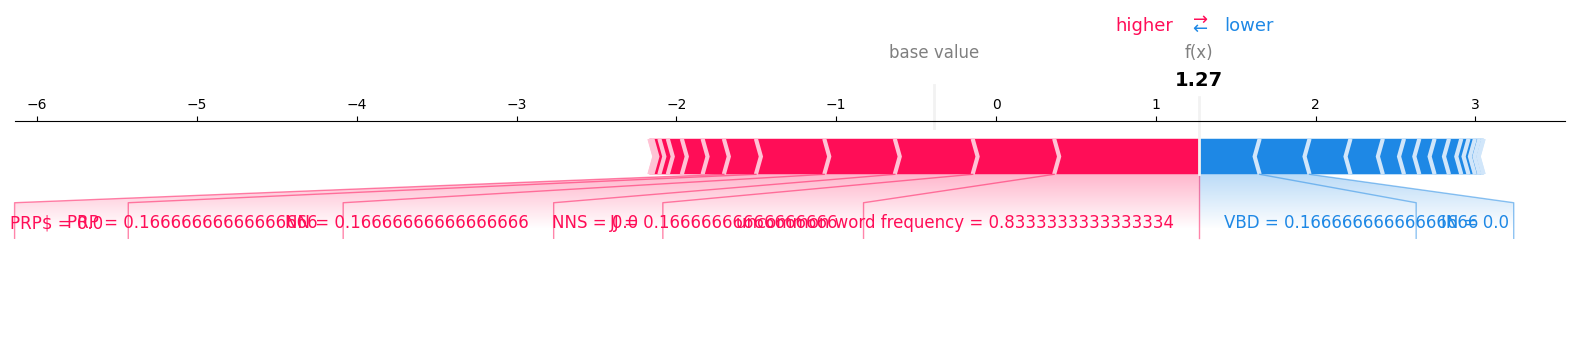

In [26]:
import shap

exp = shap.TreeExplainer(model)
sv_test = exp.shap_values(X_test)[1]

# shap.initjs()
shap.force_plot(exp.expected_value[1], sv_test[0], X_test.iloc[0], matplotlib=True)

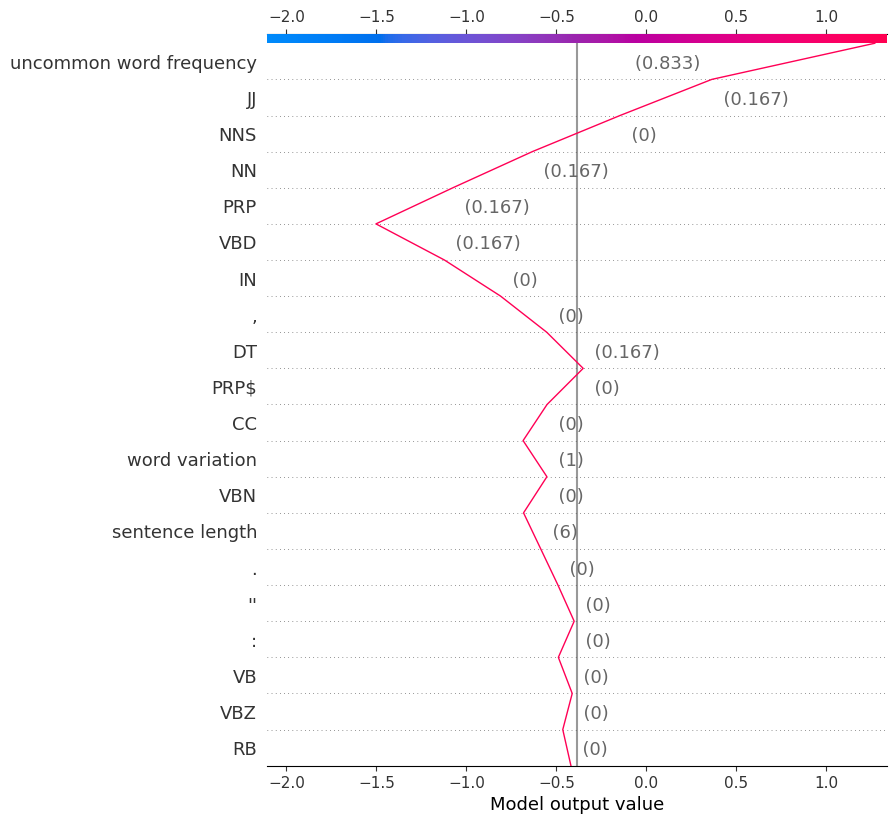

In [27]:
shap.decision_plot(exp.expected_value[1], sv_test[0], X_test.iloc[0])

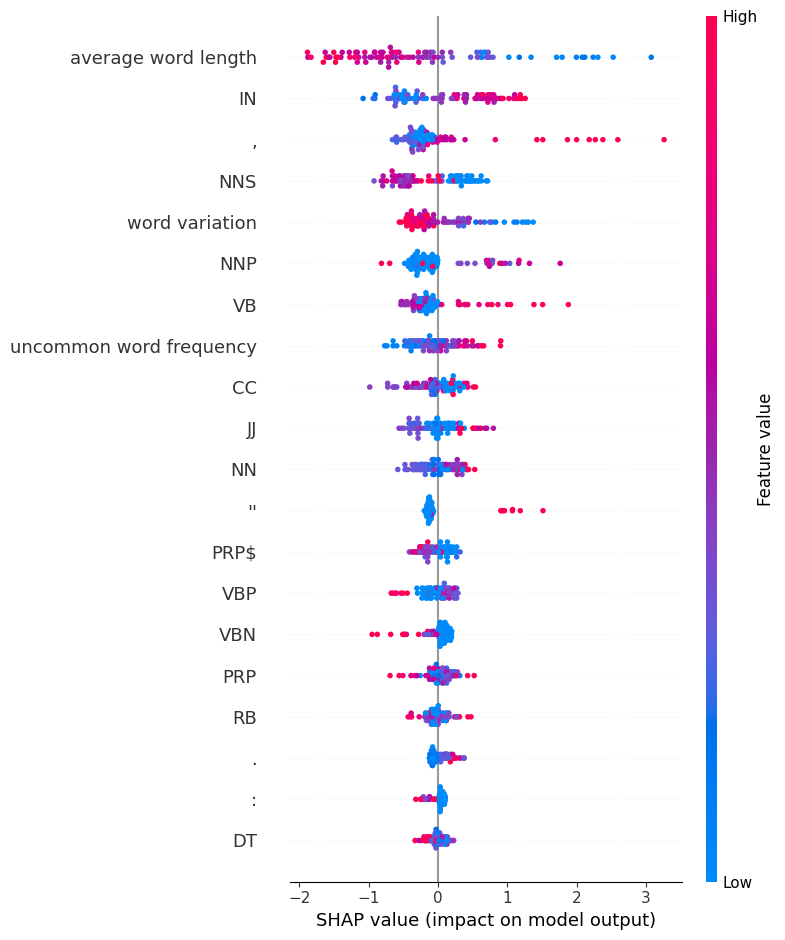

In [28]:
shap.summary_plot(sv_test, X_test)

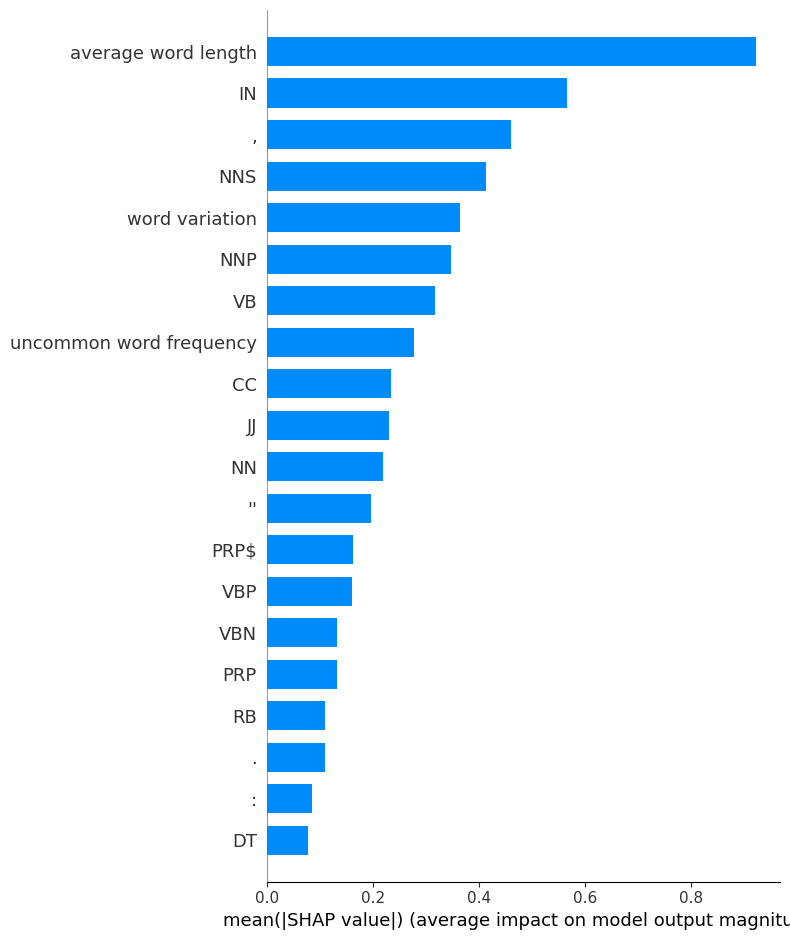

In [29]:
shap.summary_plot(sv_test, X_test, plot_type="bar")